In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
os.chdir("C:/Users/nefi.oliver.revilla1/Desktop/Proyectos/Python/Data")

In [8]:
# Importing data
seattle_weather = pd.read_csv("seattle_weather.csv", sep = ",", header = 'infer')
austin_weather = pd.read_csv("austin_weather.csv", sep = ',', header = 'infer')

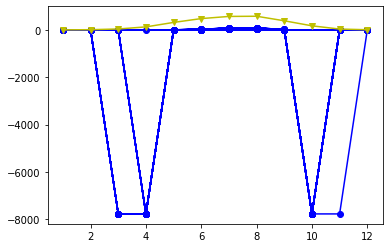

In [16]:
# To create a char with matplotlib we should call the fig,ax due to the pyplot interface
fig,ax = plt.subplots()
ax.plot(seattle_weather["DATE"], seattle_weather['MLY-CLDD-NORMAL'], marker = 'o', color = 'b')
ax.plot(austin_weather['DATE'], austin_weather['MLY-CLDD-NORMAL'], marker = 'v', color = 'y')
plt.show()

In [39]:
sp500 = pd.read_csv("S&P500.csv")
sp500 = sp500.sort_values('Date')
sp500['Expected'] = sp500['Returns']*0.80

In [40]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      10 non-null     int64  
 1   Returns   10 non-null     float64
 2   Expected  10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes


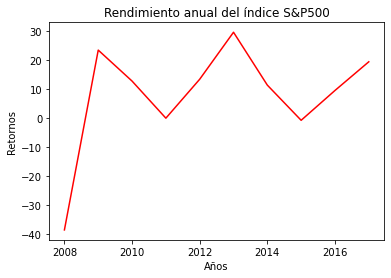

In [42]:
fig, ax = plt.subplots()
ax.plot(sp500['Date'],sp500['Returns'], color = 'r')
ax.set_xlabel("Años")
ax.set_ylabel("Retornos")
ax.set_title("Rendimiento anual del índice S&P500")
plt.show()

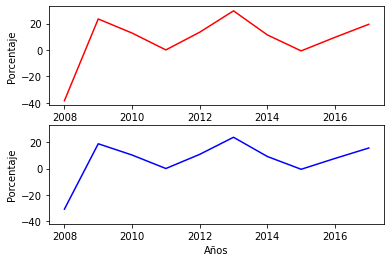

In [44]:
fig,ax = plt.subplots(2,1, sharey = True)
ax[0].plot(sp500['Date'],sp500['Returns'], color = 'r')
ax[0].set_xlabel("Años")
ax[0].set_ylabel("Porcentaje")
ax[1].plot(sp500['Date'],sp500['Expected'], color = 'b')
ax[1].set_xlabel("Años")
ax[1].set_ylabel("Porcentaje")

plt.show()

# Climate Change

In [45]:
# Read the data from file using read_csv
climate_change = pd.read_csv("climate_change.csv", parse_dates = ['date'], index_col = 'date')
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


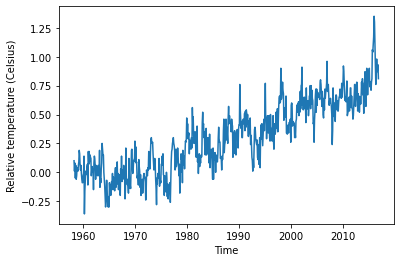

In [47]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index,climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("Relative temperature (Celsius)")

# Show the figure
plt.show()

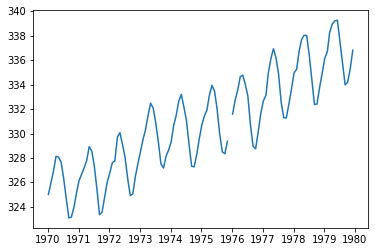

In [49]:
# Use plt.subplots to create fig and ax
fig,ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

### Using two axes

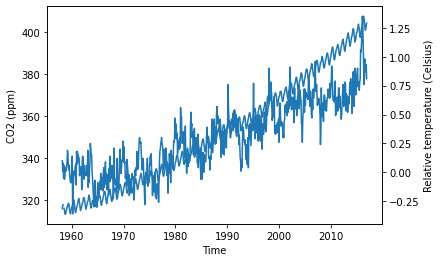

In [52]:
fog,ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
ax2 = ax.twinx() # To create one axis with the same x axis
ax2.plot(climate_change.index, climate_change["relative_temp"])
ax2.set_ylabel('Relative temperature (Celsius)')
plt.show()

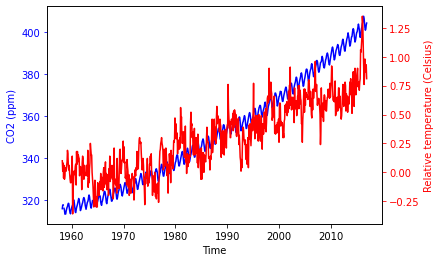

In [53]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"],color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='blue')
ax.tick_params('y', colors='blue') # Y- axis color
ax2 = ax.twinx()
ax2.plot(climate_change.index,climate_change["relative_temp"],color='red')
ax2.set_ylabel('Relative temperature (Celsius)', color='red')
ax2.tick_params('y', colors='red') # Y- axis color
plt.show()

In [54]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

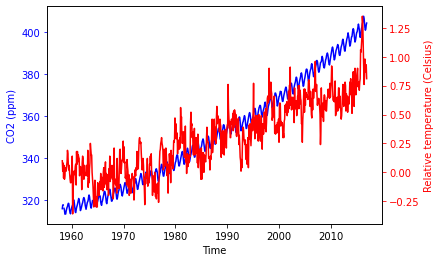

In [56]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius)')
plt.show()

### Annotations

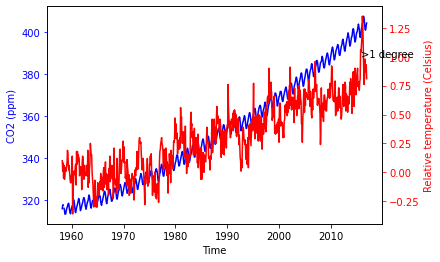

In [61]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius)')
ax2.annotate(">1 degree",xy=[pd.to_datetime("2015-10-06"), 1])
plt.show()

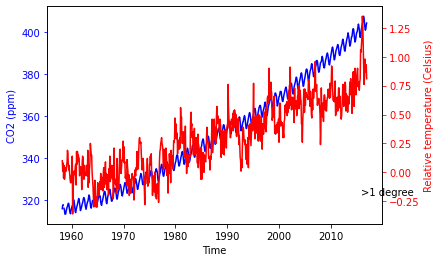

In [64]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius)')
ax2.annotate(">1 degree",xy=[pd.to_datetime("2015-10-06"), 1],
            xytext = [pd.to_datetime('2015-10-06'), -0.2])

plt.show()

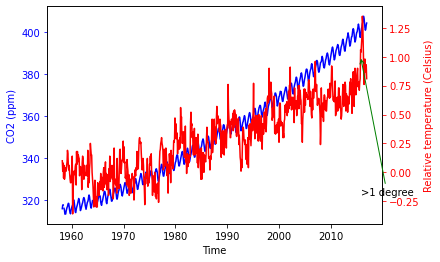

In [66]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius)')
ax2.annotate(">1 degree",xy=[pd.to_datetime("2015-10-06"), 1],
            xytext = [pd.to_datetime('2015-10-06'), -0.2],
            arrowprops = {"arrowstyle":"->", "color":"green"})

plt.show()

# Quantitative comparisons

## Bar

In [68]:
medals = pd.read_csv("medals_by_country_2016.csv", index_col = 0)
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


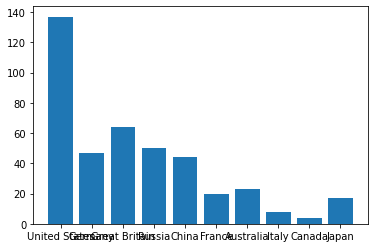

In [69]:
fig,ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
plt.show()

C:\Users\nefi.oliver.revilla1\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


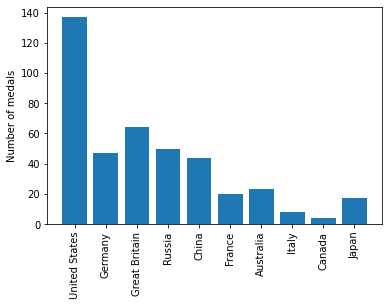

In [70]:
# Rotate the tick labels
fig,ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
ax.set_xticklabels(medals.index, rotation = 90)
ax.set_ylabel("Number of medals")
plt.show()

C:\Users\nefi.oliver.revilla1\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


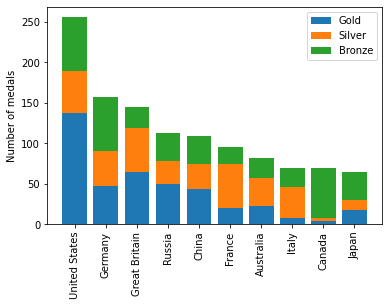

In [82]:
fig,ax = plt.subplots()
ax.bar(medals.index, medals["Gold"], label = 'Gold')
ax.bar(medals.index, medals["Silver"],bottom = medals['Gold'],label = 'Silver')
ax.bar(medals.index, medals["Bronze"],bottom = medals['Gold']+ medals['Silver'],label = 'Bronze')
ax.set_xticklabels(medals.index,rotation = 90)
ax.set_ylabel("Number of medals")
ax.legend()
plt.show()

## Histograms

In [84]:
olympic_games = pd.read_csv("summer2016.csv")
olympic_games.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [112]:
mens_rowing = olympic_games[(olympic_games['Sport'] == "Rowing") & (olympic_games["Sex"] == "M")]
mens_gymnastics = olympic_games[(olympic_games['Sport'] == "Gymnastics") & (olympic_games["Sex"] == "M")]
mens_Taekwondo = olympic_games[(olympic_games['Sport'] == "Taekwondo") & (olympic_games["Sex"] == "M")]
mens_Handball = olympic_games[(olympic_games['Sport'] == "Handball") & (olympic_games["Sex"] == "M")]

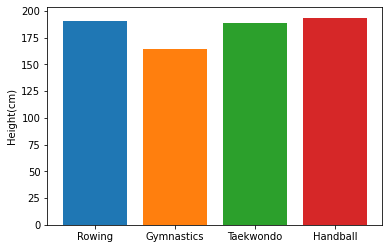

In [113]:
fig,ax = plt.subplots()
ax.bar("Rowing", mens_rowimg["Height"].mean())
ax.bar("Gymnastics", mens_gymnastics["Height"].mean())
ax.bar("Taekwondo", mens_Taekwondo["Height"].mean())
ax.bar("Handball", mens_Handball["Height"].mean())
ax.set_ylabel("Height(cm)")
plt.show()

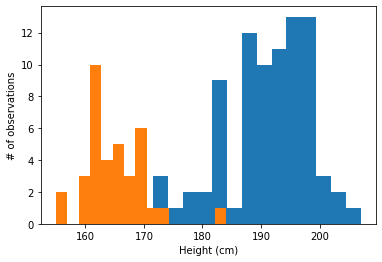

In [106]:
fig,ax = plt.subplots()
ax.hist(mens_rowing["Height"], bins = 15)
ax.hist(mens_gymnastics["Height"], bins = 15)
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
plt.show()

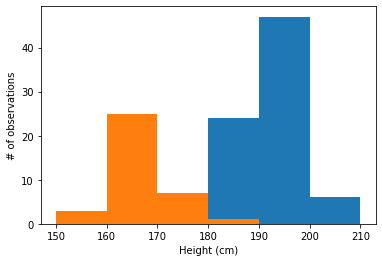

In [107]:
bins_list = [150,160,170,180,190,200,210]

fig,ax = plt.subplots()
ax.hist(mens_rowing["Height"], bins = bins_list)
ax.hist(mens_gymnastics["Height"], bins = bins_list)
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
plt.show()

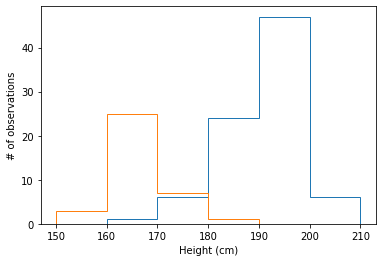

In [109]:
# Change the type of histogram
bins_list = [150,160,170,180,190,200,210]

fig,ax = plt.subplots()
ax.hist(mens_rowing["Height"], bins = bins_list, histtype = 'step')
ax.hist(mens_gymnastics["Height"], bins = bins_list, histtype = 'step')
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
plt.show()

## Statistical plotting

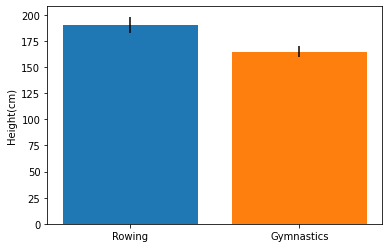

In [110]:
fog,ax = plt.subplots()
ax.bar("Rowing", mens_rowimg["Height"].mean(), yerr = mens_rowing["Height"].std())
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr = mens_gymnastics["Height"].std())
ax.set_ylabel("Height(cm)")
plt.show()

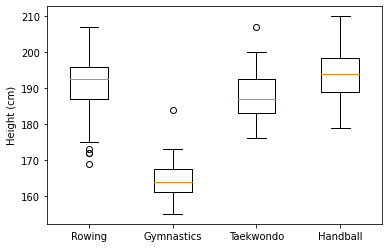

In [114]:
fig,ax = plt.subplots()
ax.boxplot([mens_rowing['Height'],
            mens_gymnastics['Height'],
            mens_Taekwondo['Height'],
            mens_Handball['Height']
           ])
ax.set_xticklabels(['Rowing','Gymnastics','Taekwondo','Handball'])
ax.set_ylabel("Height (cm)")
plt.show()

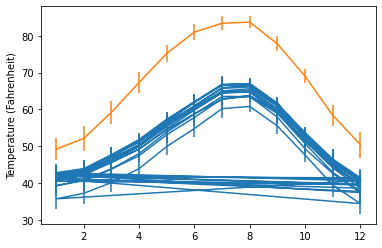

In [115]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"], yerr = seattle_weather["MLY-TAVG-STDDEV"] )

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['DATE'],austin_weather['MLY-TAVG-NORMAL'], yerr = austin_weather['MLY-TAVG-STDDEV'] )

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

## Scatterplots

In [139]:
climate_change = pd.read_csv("climate_change.csv")
climate_change.head()

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


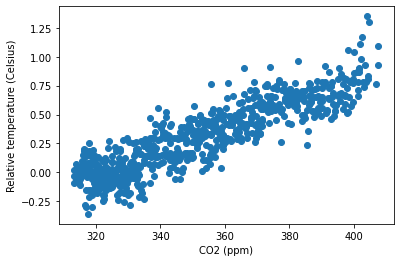

In [140]:
fig,ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'])
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

In [142]:
climate_change_2 = climate_change.set_index('date')

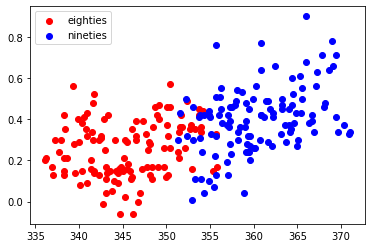

In [143]:
eighties = climate_change_2["1980-01-01":"1989-12-31"]
nineties = climate_change_2["1990-01-01":"1999-12-31"]
fig,ax = plt.subplots()
ax.scatter(eighties["co2"],eighties["relative_temp"], color = 'red', label = 'eighties')
ax.scatter(nineties["co2"],nineties["relative_temp"], color = 'blue', label = 'nineties')
ax.legend()
plt.show()

### Encoding a third variable by color

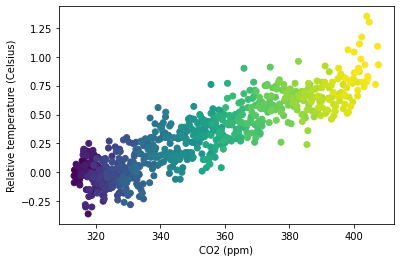

In [144]:
fig,ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'],
          c=climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

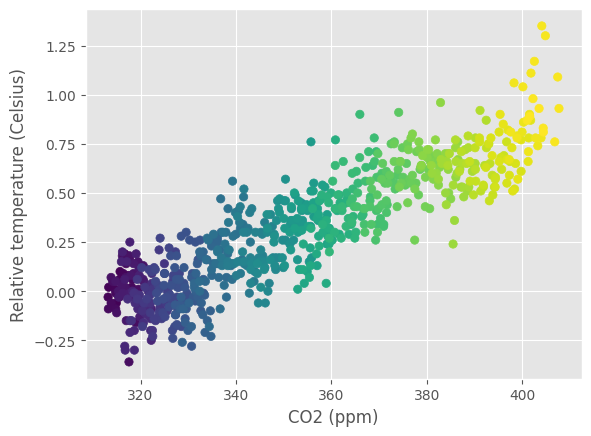

In [147]:
plt.style.use("ggplot")
fig,ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'],
          c=climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

....Guidelines for choosing plotting style

Dark backgrounds are usually less visible.

If color is important consider choosing colorblind-friendly options such as "seaborn-colorblind" or "tableau-colorblind10".

If it will be printed in black-and-while, use the "grayscale" style

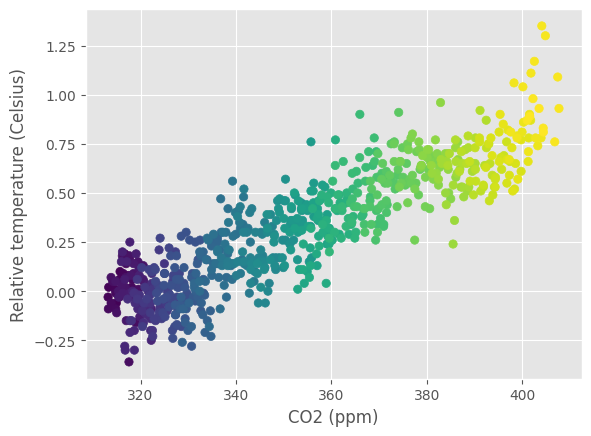

In [148]:
## plt.style.use("ggplot")
fig,ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'],
          c=climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

# Saving chart
fig.savefig("CO2_RelativeTemperatura.jpg")


Text(0, 0.5, 'Relative temperature (Celsius)')

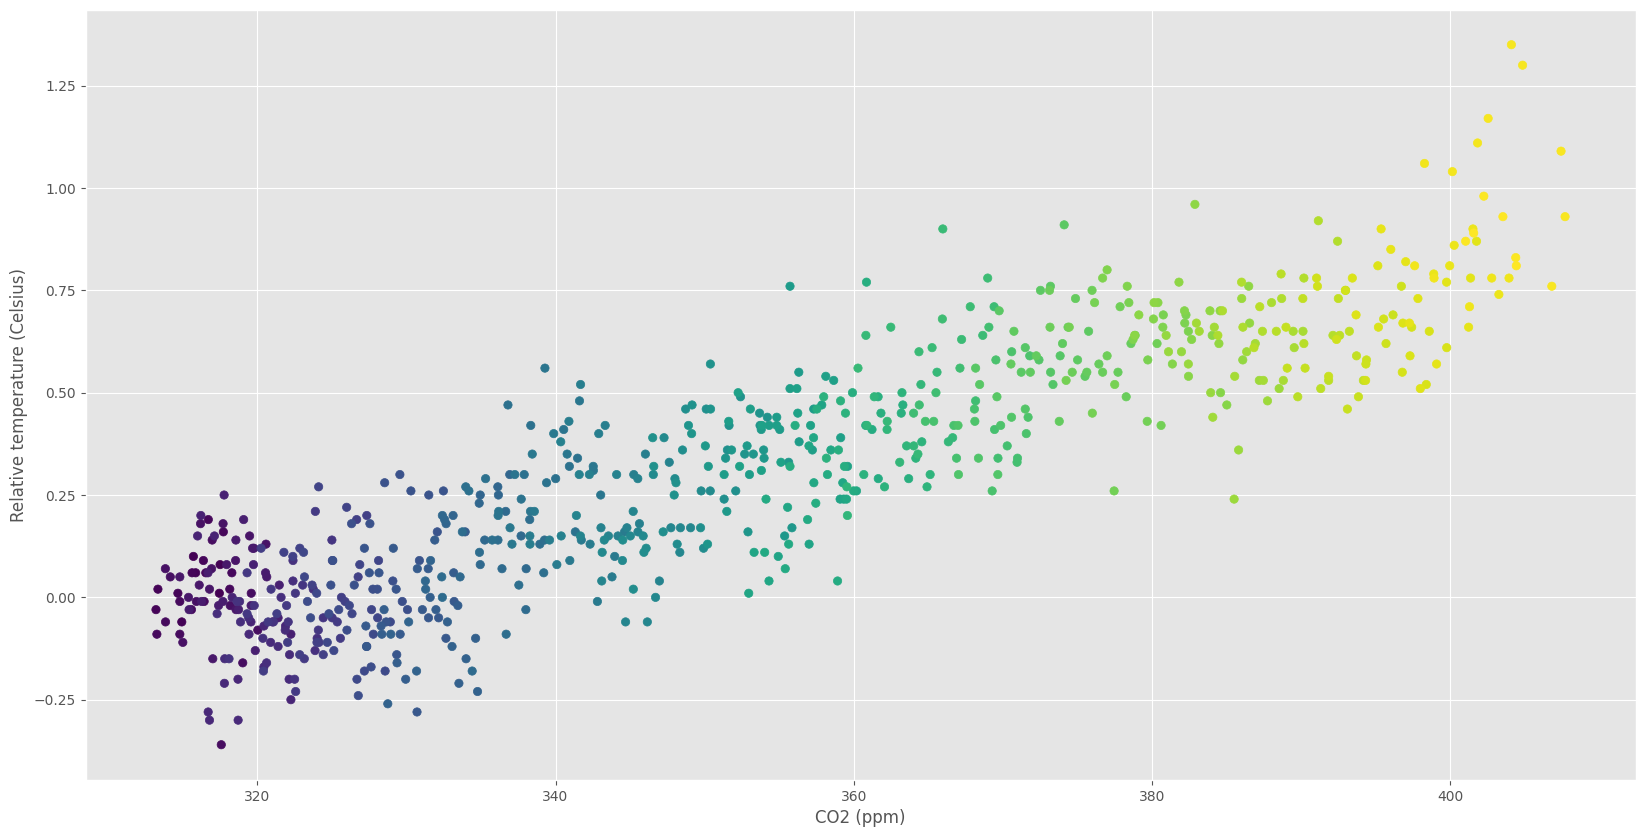

In [152]:
## plt.style.use("ggplot")
fig,ax = plt.subplots()
## Control the size of the figure
fig.set_size_inches([20,10])
ax.scatter(climate_change['co2'], climate_change['relative_temp'],
          c=climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

In [153]:
olympic_games.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [158]:
sports = olympic_games['Sport'].unique()

C:\Users\nefi.oliver.revilla1\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


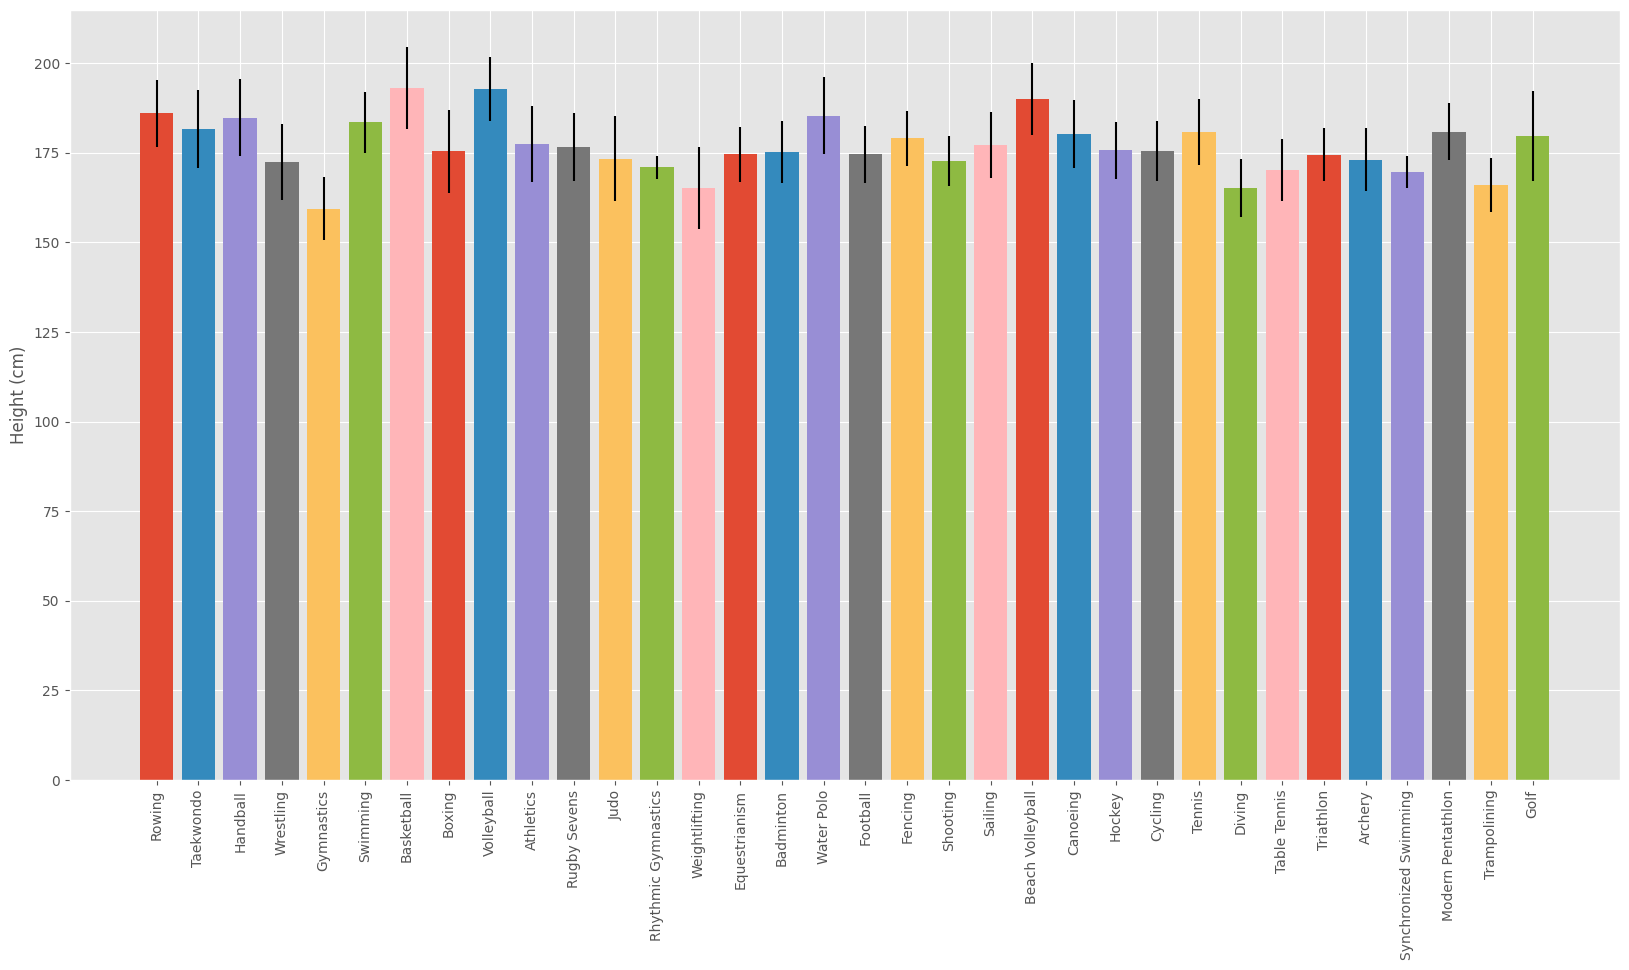

In [161]:
fig, ax = plt.subplots()
fig.set_size_inches([20,10])
for sport in sports:
    sport_df = olympic_games[olympic_games['Sport'] == sport]
    ax.bar(sport, sport_df['Height'].mean(),
          yerr = sport_df['Height'].std())
ax.set_ylabel("Height (cm)")
ax.set_xticklabels(sports, rotation = 90)
plt.show()